# Forecasting the _Reach_ metric for the ICICI Bank.

We will start with XGB Regressor to predict the future Reach, knowing that this is not recommended to use Trees based models, but it will be a good practice, before using the PCA architecture used by [1]

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns                            # more plots
sns.set()
from tqdm import tqdm_notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [4]:
path = os.path.join('C:\\',"Users","Animesh","Downloads","Sample_MW_data1.xlsx")

In [4]:
data = pd.read_excel(path,encoding = "ISO-8859-1")

In [5]:
imp_attr_data = data.drop(columns = ['Headline','URL','Opening Text','Hit Sentence','Influencer','Country','Subregion','National Viewership','Sentiment','Key Phrases','Input Name','Keywords','Document Tags'])

In [6]:
imp_attr_data.set_index('Date',inplace=True)

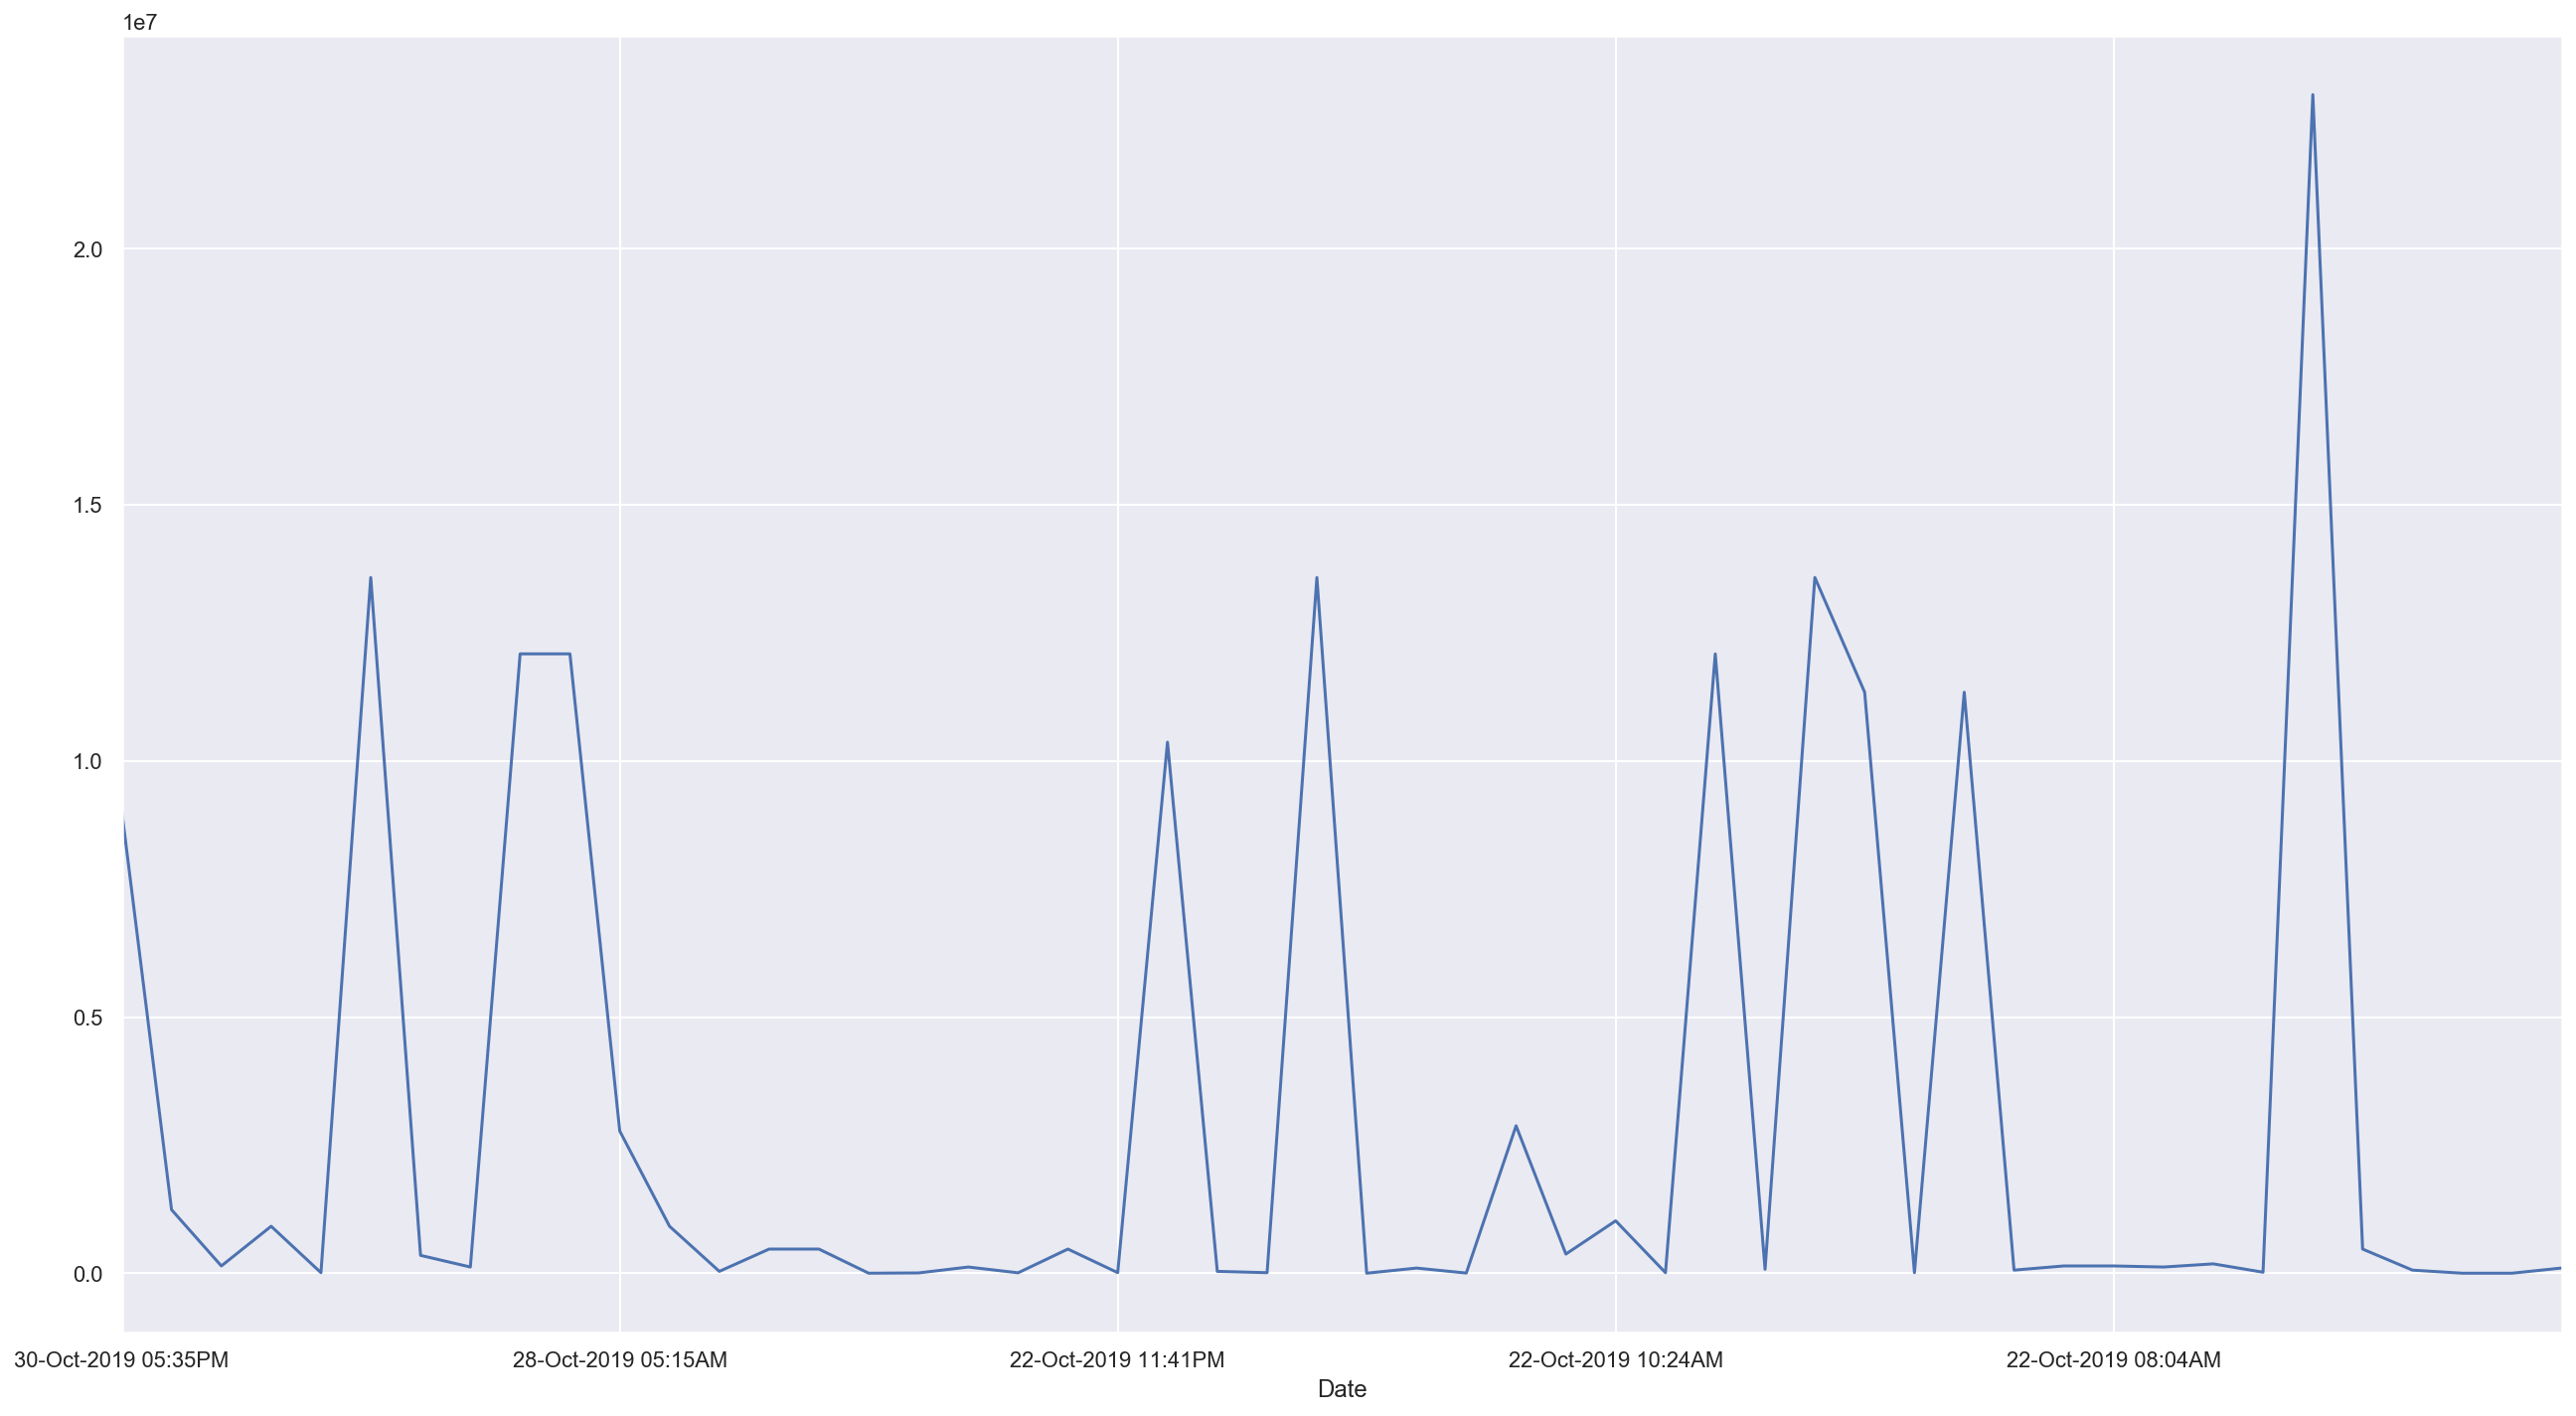

In [7]:
plt.figure(figsize = (22,12))
imp_attr_data['Reach'].plot()

In [8]:
new_index = pd.to_datetime(imp_attr_data.index)
imp_attr_data.set_index(new_index, inplace = True)

In [9]:
imp_data_attr = imp_attr_data.iloc[::-1]

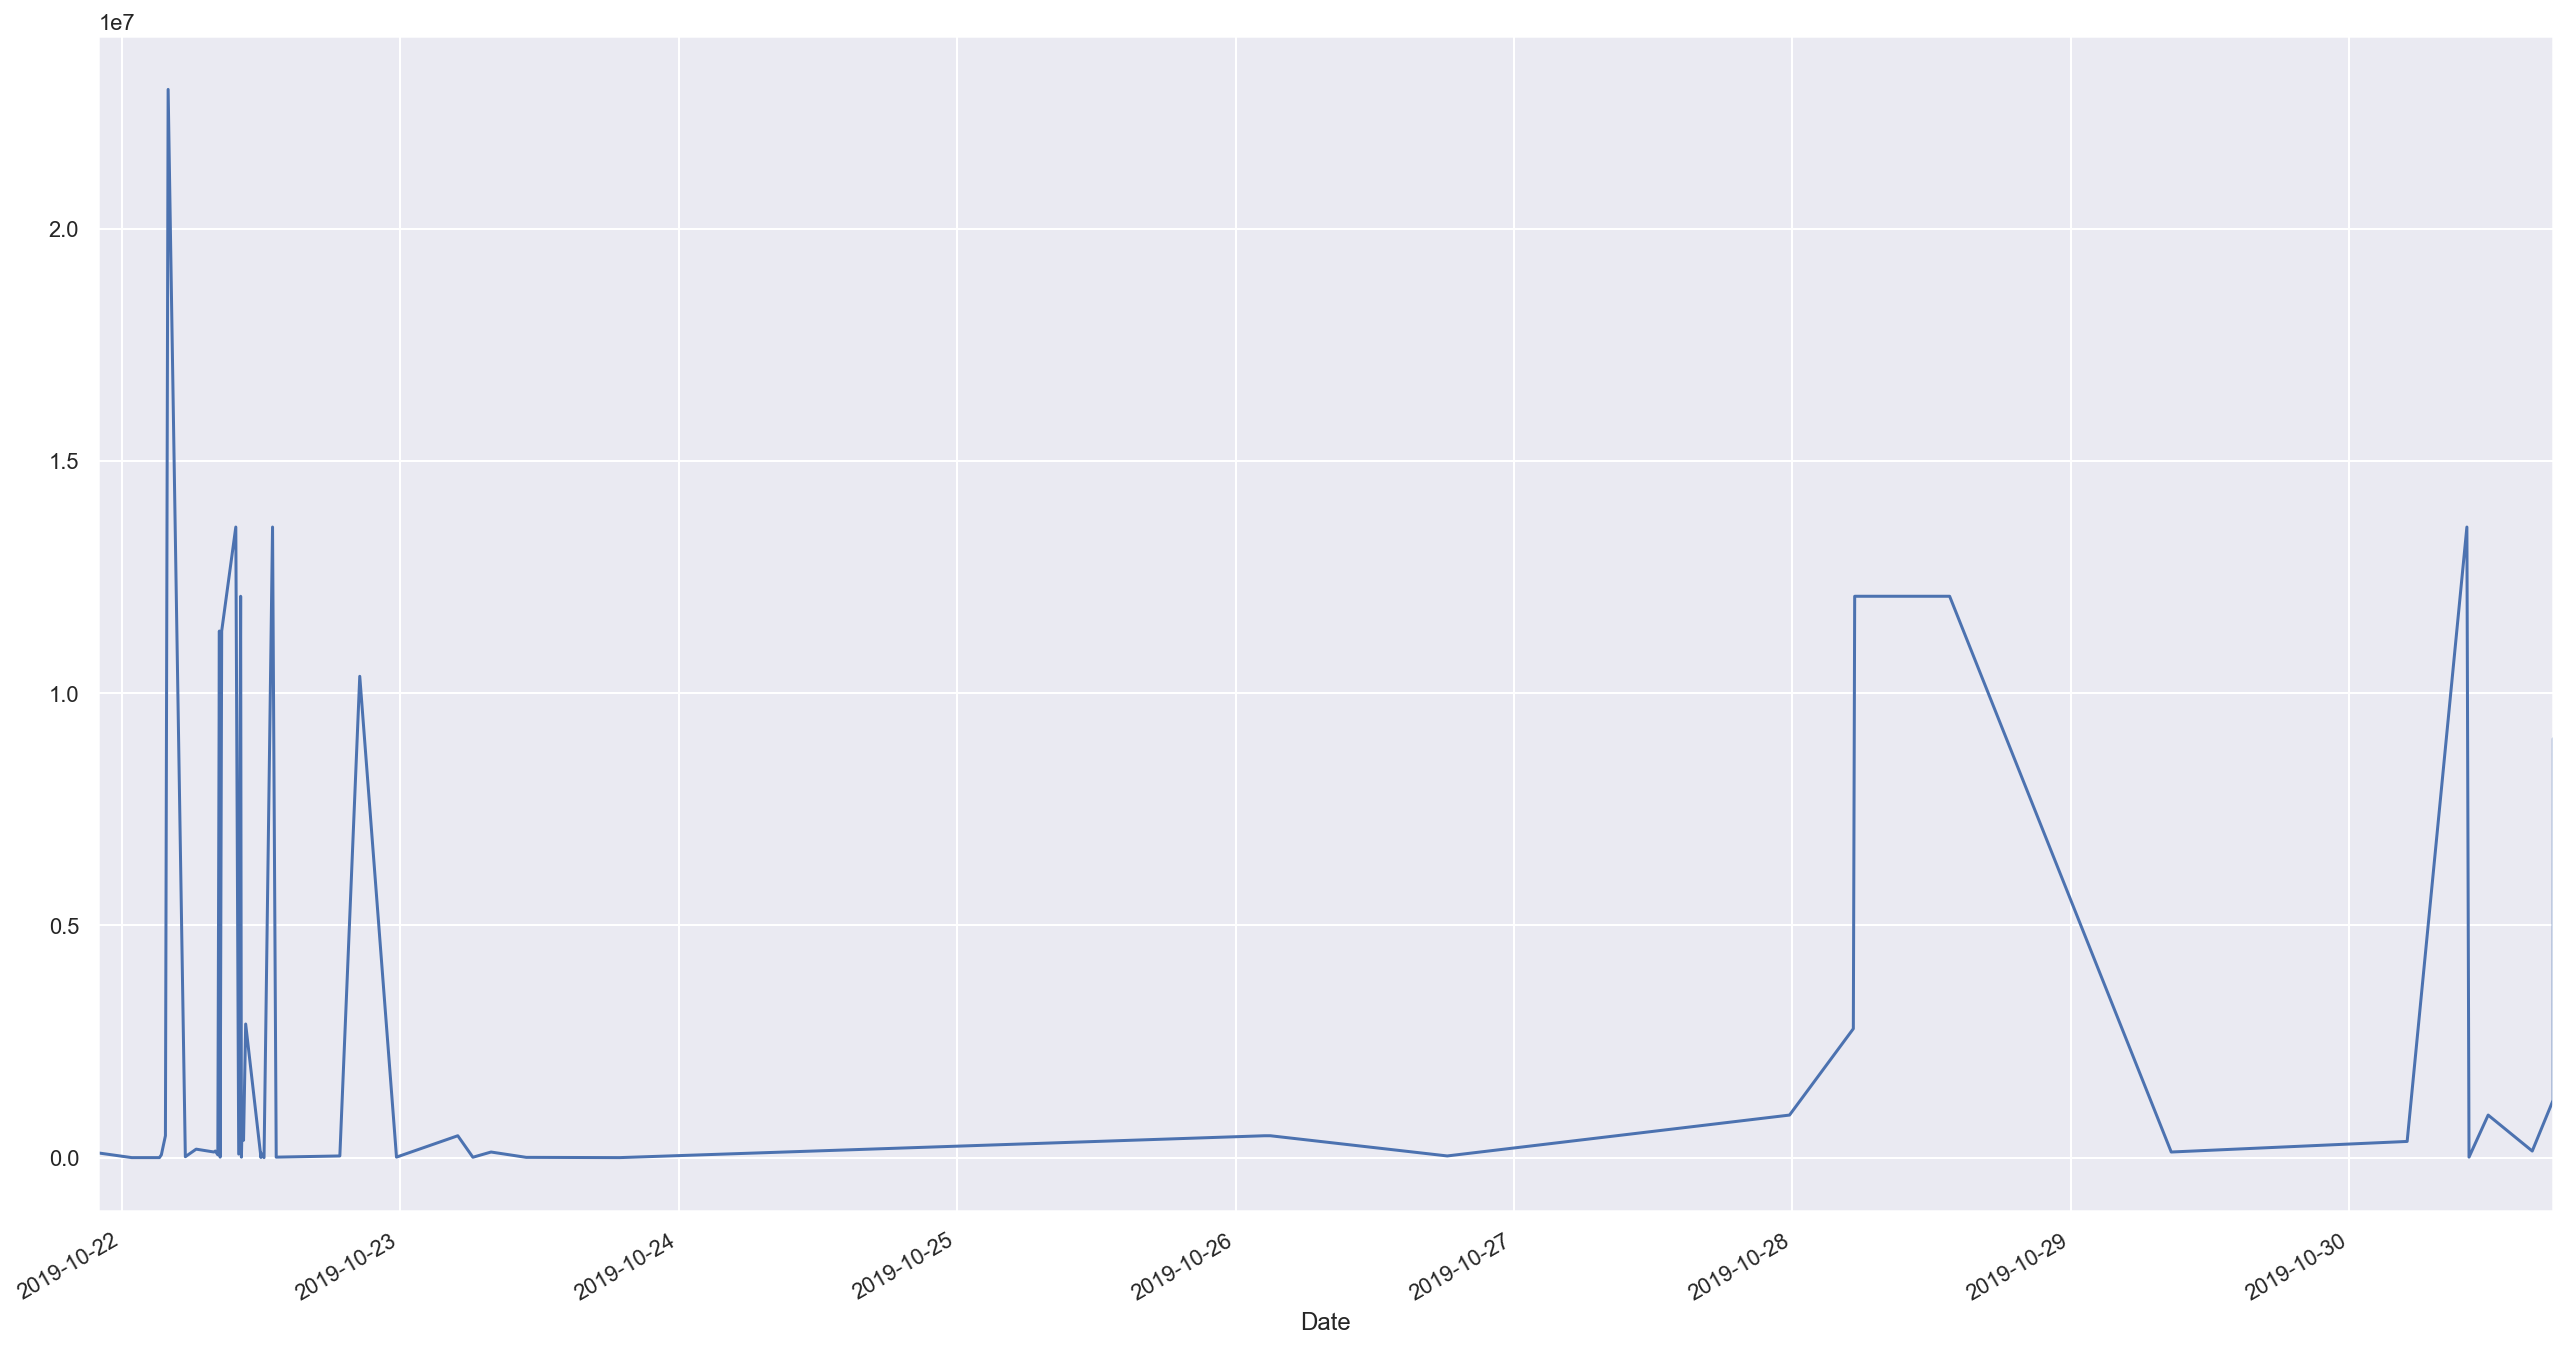

In [10]:
plt.figure(figsize = (22,12))
imp_attr_data["Reach"].plot()

In [11]:
imp_attr_data_HS = imp_attr_data.resample('60T').sum()

In [12]:
imp_attr_data_HS # HS for Hour Sampled....

,Reach,Desktop Reach,Mobile Reach,AVE
Date,,,,
2019-10-21 21:00:00,101695,34274,67421,940.68
2019-10-21 22:00:00,0,0,0,0.00
2019-10-21 23:00:00,0,0,0,0.00
2019-10-22 00:00:00,220,172,48,2.04
2019-10-22 01:00:00,0,0,0,0.00
2019-10-22 02:00:00,0,0,0,0.00
2019-10-22 03:00:00,532005,224438,307567,4921.04
2019-10-22 04:00:00,23003621,9797441,13206180,212783.49
2019-10-22 05:00:00,19678,9435,10243,182.02


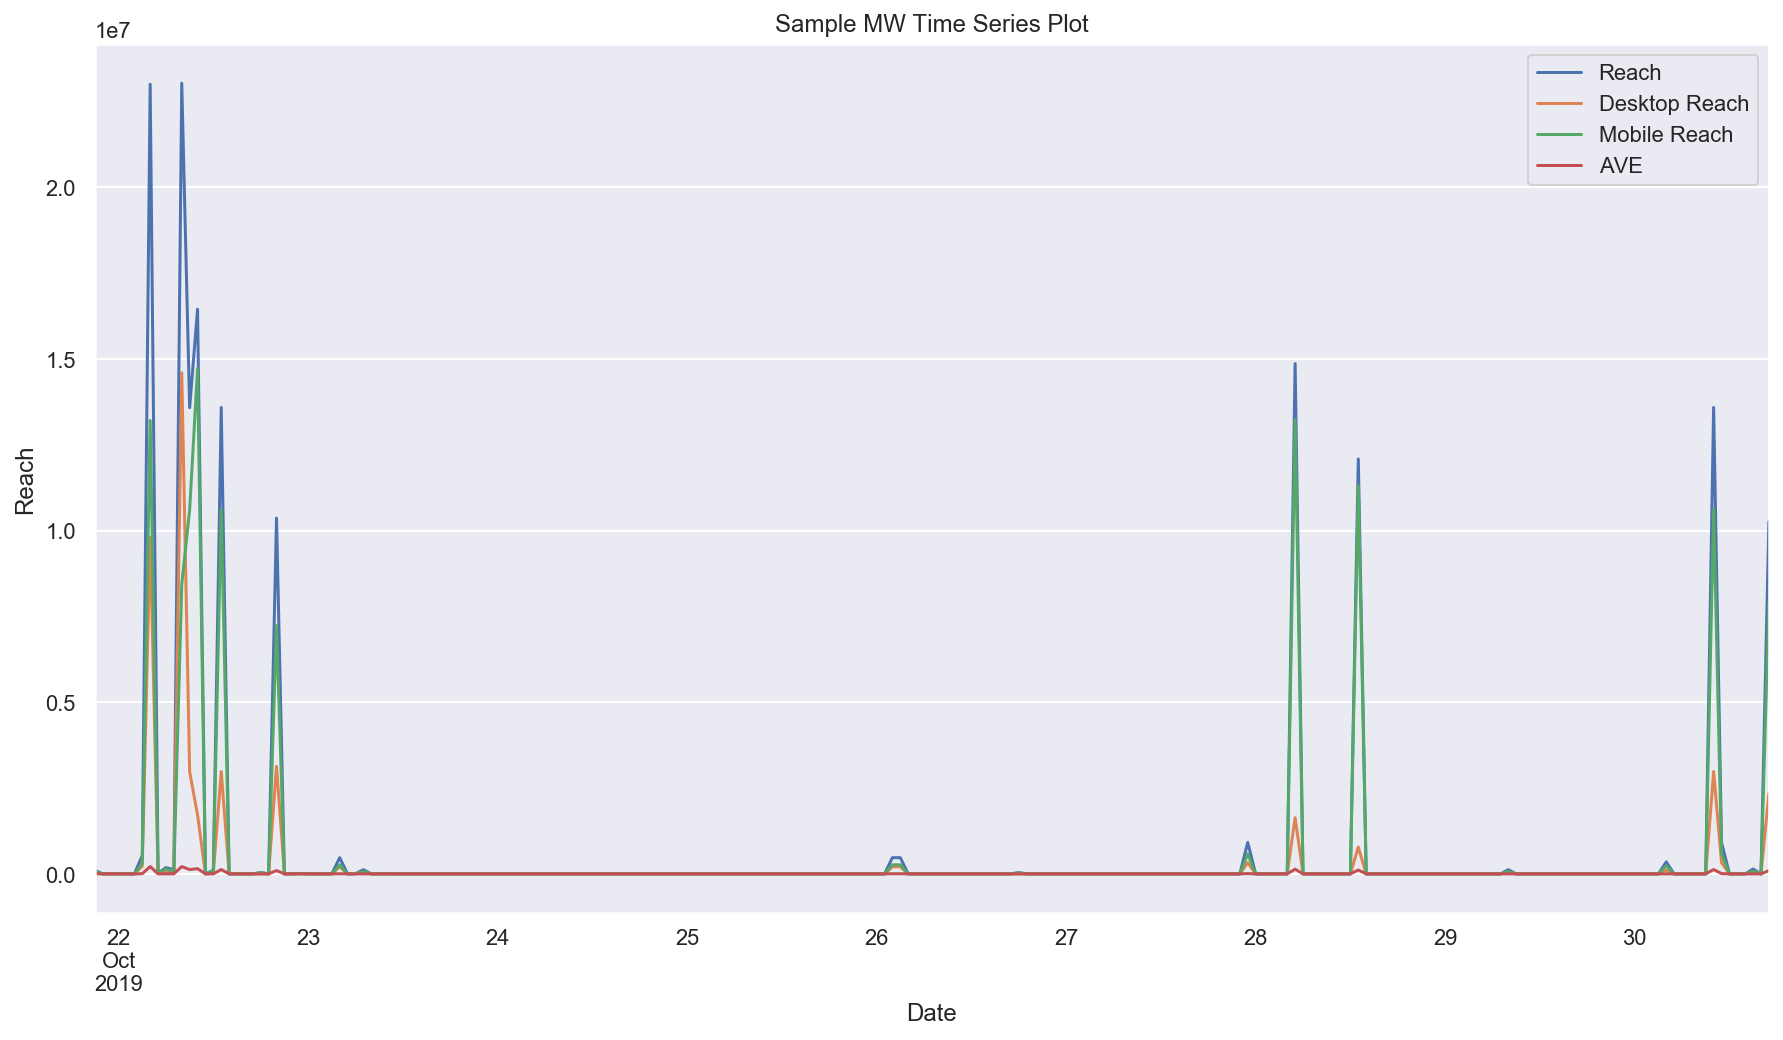

In [13]:
plt.figure(figsize = (15,8))
plt.xlabel("Date (Hourwise Granular)")
plt.ylabel("Reach")
imp_attr_data_HS['Reach'].plot()
imp_attr_data_HS["Desktop Reach"].plot()
imp_attr_data_HS["Mobile Reach"].plot()
imp_attr_data_HS["AVE"].plot()
plt.title("Sample MW Time Series Plot")
plt.legend()

##### Writing the above process as a function:-

In [14]:
def basic_MW_preprocessing(path, plot = False, plot_title = 'Meltwater',drop_labels = None ):
    '''
    Returns the data in correct format (i.e. in increasing order) and with bins created for every hour/day.
    ------------
    drop_labels : list of names of labels to drop. Please note that this moght cause error during binning, 
                    thus suggest to use default drop_labels only.
    '''
    data = pd.read_excel(path,encoding = "ISO-8859-1")
    
    if drop_labels:
        imp_attr_data = data.drop(columns = drop_labels)
        
    else:
        imp_attr_data = data.drop(columns = ['Headline','URL','Opening Text','Hit Sentence','Influencer','Country','Subregion','National Viewership','Sentiment','Key Phrases','Input Name','Keywords','Document Tags'])
        
    imp_attr_data.set_index('Date',inplace=True)
    
    new_index = pd.to_datetime(imp_attr_data.index)
    imp_attr_data.set_index(new_index, inplace = True)
    
    imp_data_attr = imp_attr_data.iloc[::-1]
    
    imp_attr_data_HS = imp_attr_data.resample('60T').sum()
    
    if plot:
        plt.figure(figsize = (15,8))
        plt.xlabel("Date (Hourwise Granular)")
        imp_attr_data_HS['Reach'].plot()
        imp_attr_data_HS["Desktop Reach"].plot()
        imp_attr_data_HS["Mobile Reach"].plot()
        imp_attr_data_HS["AVE"].plot()
        plt.title(plot_title)
        plt.legend()
    
    return imp_attr_data_HS

,Reach,Desktop Reach,Mobile Reach,AVE
Date,,,,
2019-10-21 21:00:00,101695,34274,67421,940.68
2019-10-21 22:00:00,0,0,0,0.00
2019-10-21 23:00:00,0,0,0,0.00
2019-10-22 00:00:00,220,172,48,2.04
2019-10-22 01:00:00,0,0,0,0.00
2019-10-22 02:00:00,0,0,0,0.00
2019-10-22 03:00:00,532005,224438,307567,4921.04
2019-10-22 04:00:00,23003621,9797441,13206180,212783.49
2019-10-22 05:00:00,19678,9435,10243,182.02


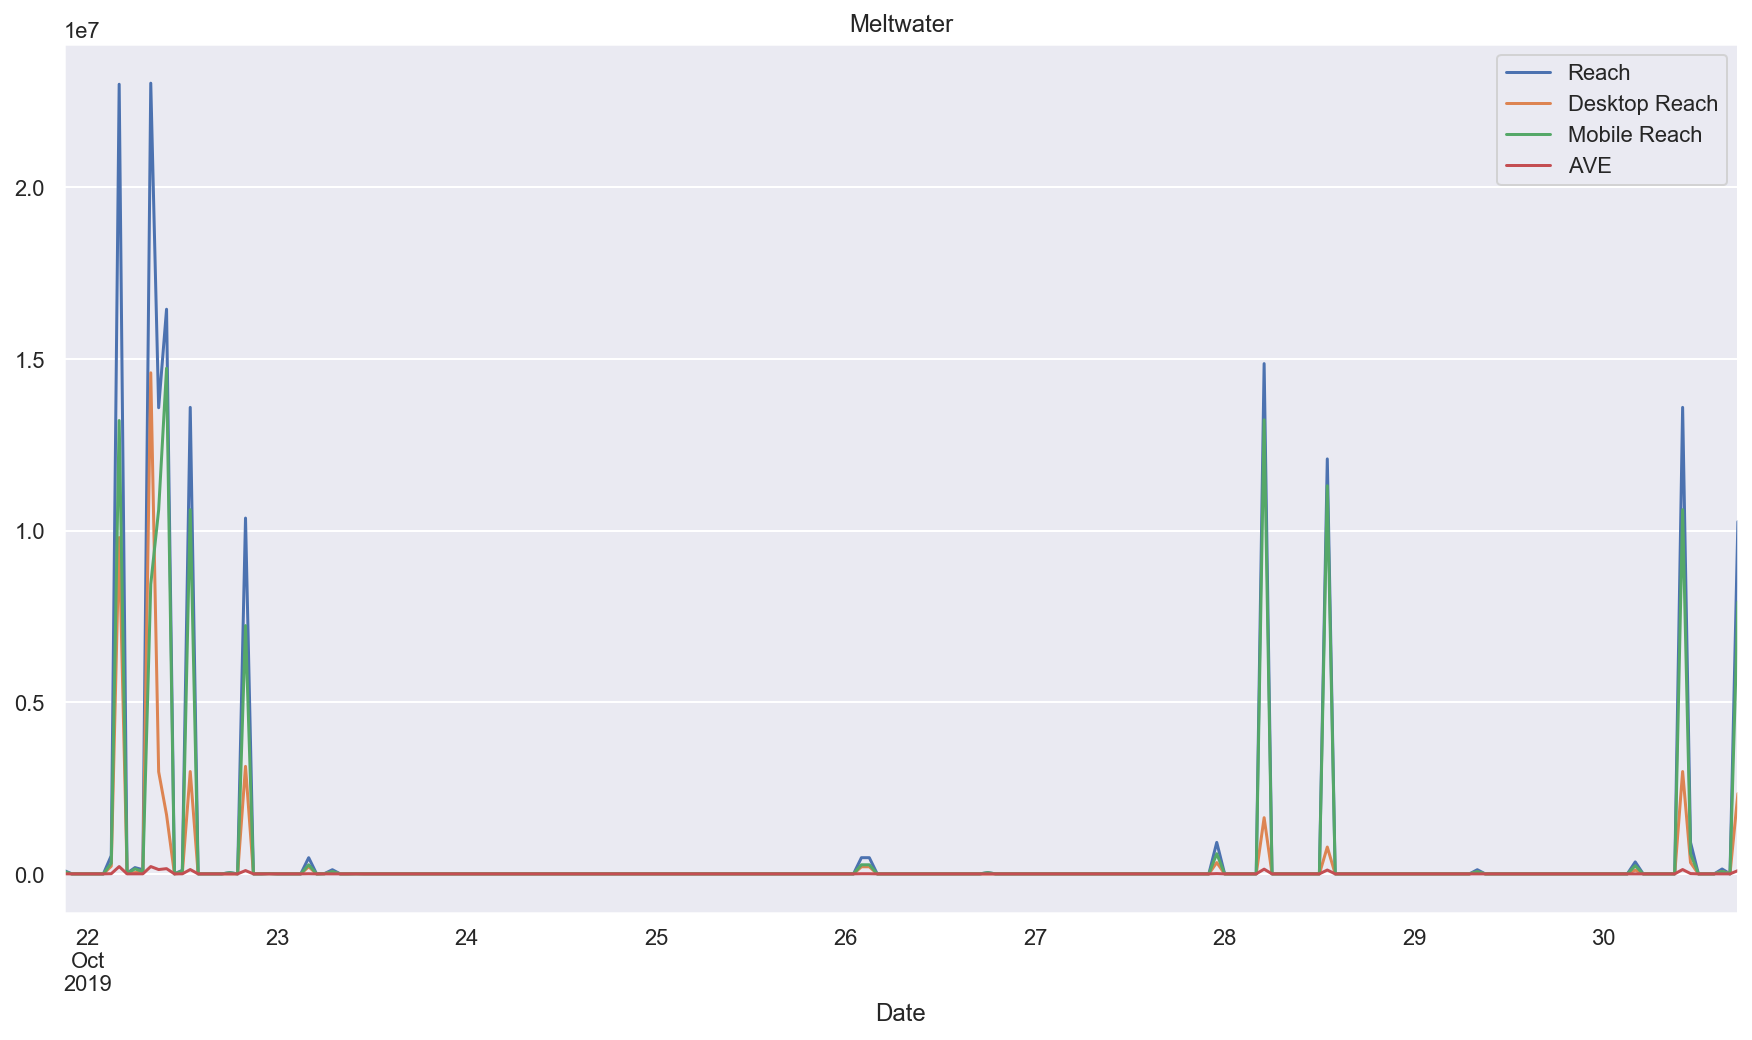

In [15]:
basic_MW_preprocessing(path, True)

In [16]:
path_2 = os.path.join('C:\\',"Users","Animesh","Downloads","MW_Data_big.xlsx")

,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,Engagement,AVE
Date,,,,,,,,
2018-06-01 12:00:00,318240,0,0,1,0,0,0.0,2943.73
2018-06-01 13:00:00,1642,0,0,0,0,0,0.0,15.19
2018-06-01 14:00:00,1206,0,0,0,0,0,0.0,11.16
2018-06-01 15:00:00,0,0,0,0,0,0,0.0,0.00
2018-06-01 16:00:00,0,0,0,0,0,0,0.0,0.00
2018-06-01 17:00:00,0,0,0,0,0,0,0.0,0.00
2018-06-01 18:00:00,0,0,0,0,0,0,0.0,0.00
2018-06-01 19:00:00,0,0,0,0,0,0,0.0,0.00
2018-06-01 20:00:00,0,0,0,0,0,0,0.0,0.00


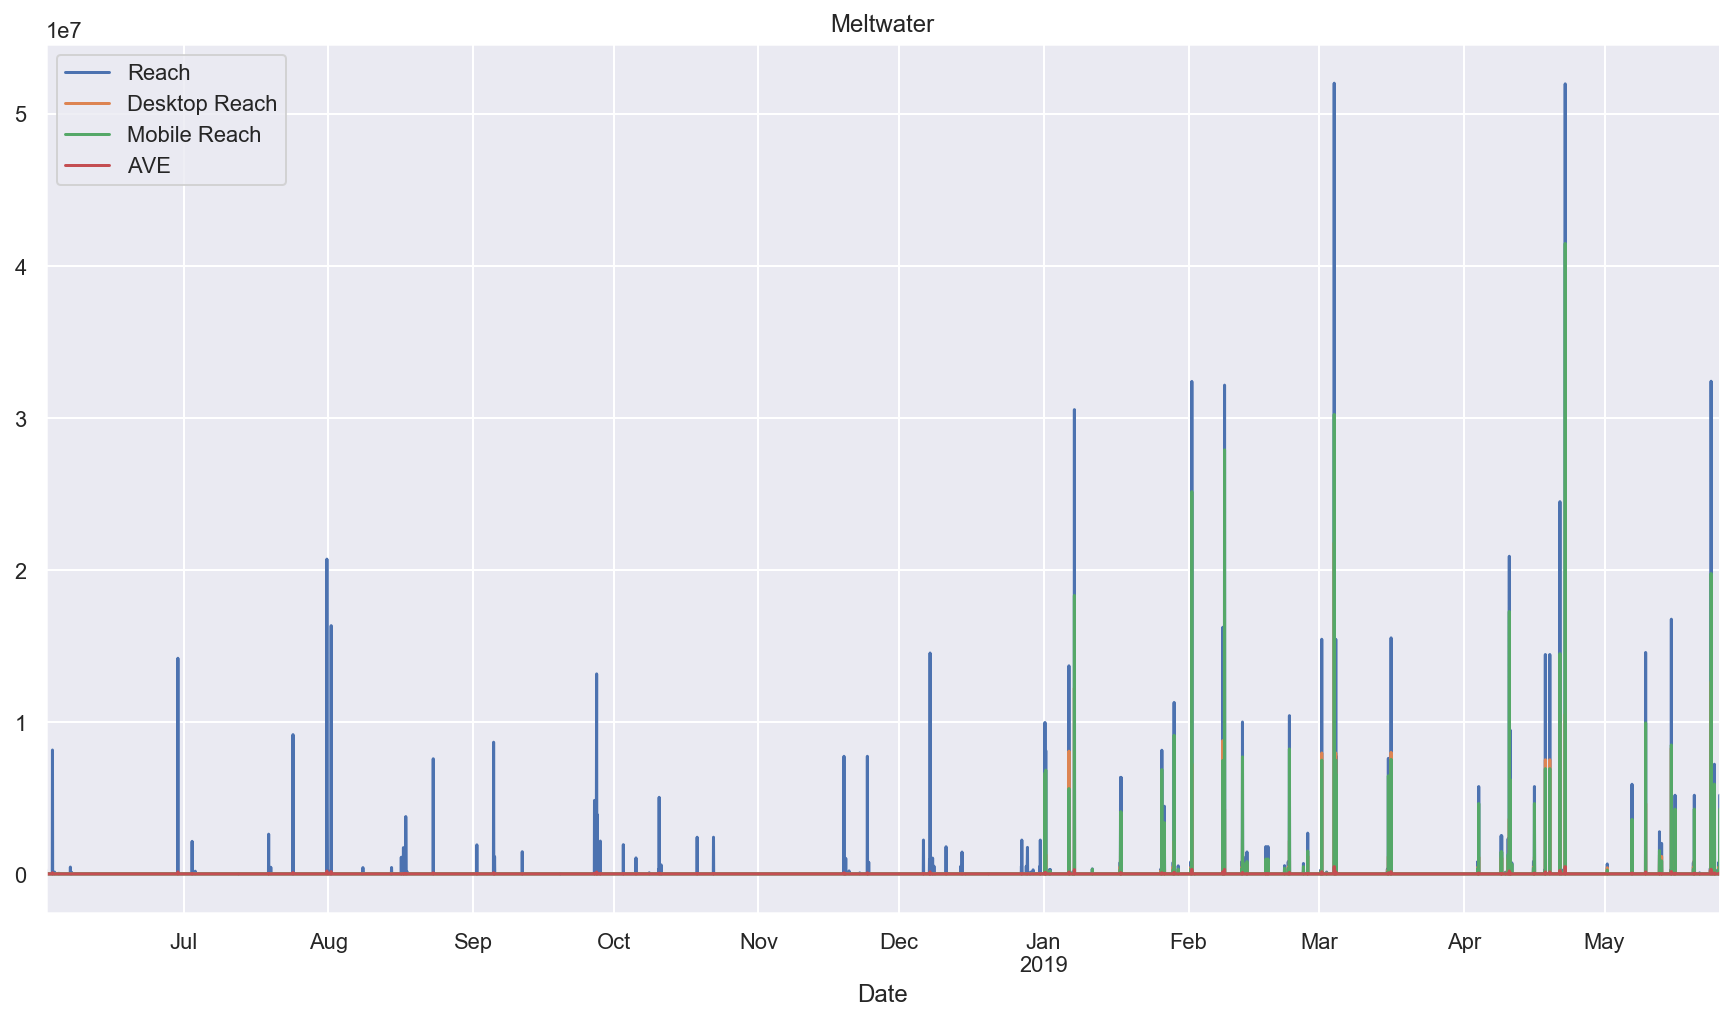

In [17]:
basic_MW_preprocessing(path_2,True)

In [18]:
icici_path_1 = os.path.join('C:\\',"Users","Animesh","Downloads","29janto30nov.xlsx")
icici_path_2 = os.path.join('C:\\',"Users","Animesh","Downloads","30novto31jan.xlsx")
icici_path_3 = os.path.join('C:\\',"Users","Animesh","Downloads","29novto6dec.xlsx")

In [19]:
icici_1 = pd.read_excel(icici_path_1) # 30 nov 2017 to 29 jan 2018
icici_2 = pd.read_excel(icici_path_2) # 31 jan 2018 to 30 nov 2018 
icici_3 = pd.read_excel(icici_path_3) # 6 dec 2018 to 29 nov 2019

##### Hence, we don't have data of the dates $\verb|30 January 2018|$ and $\verb|30 Novemeber 2018|$ and date from range $\verb|1 December 2018|$ to $\verb|5 December 2018|$

In [20]:
comb_df = icici_1.iloc[::-1].append(icici_2[::-1]).append(icici_3[::-1])

In [21]:
plt.figure(figsize = (22,12))
comb_df_Reach = comb_df.set_index("Date")['Reach']

<Figure size 1584x864 with 0 Axes>

In [22]:
comb_df_Reach = pd.DataFrame(comb_df_Reach)

In [23]:
final_df_reach = comb_df_Reach.set_index(pd.to_datetime(comb_df_Reach.index))

In [24]:
comb_df_Reach.to_csv("C:\\Users\\Animesh\\Combined_ICICI.csv")

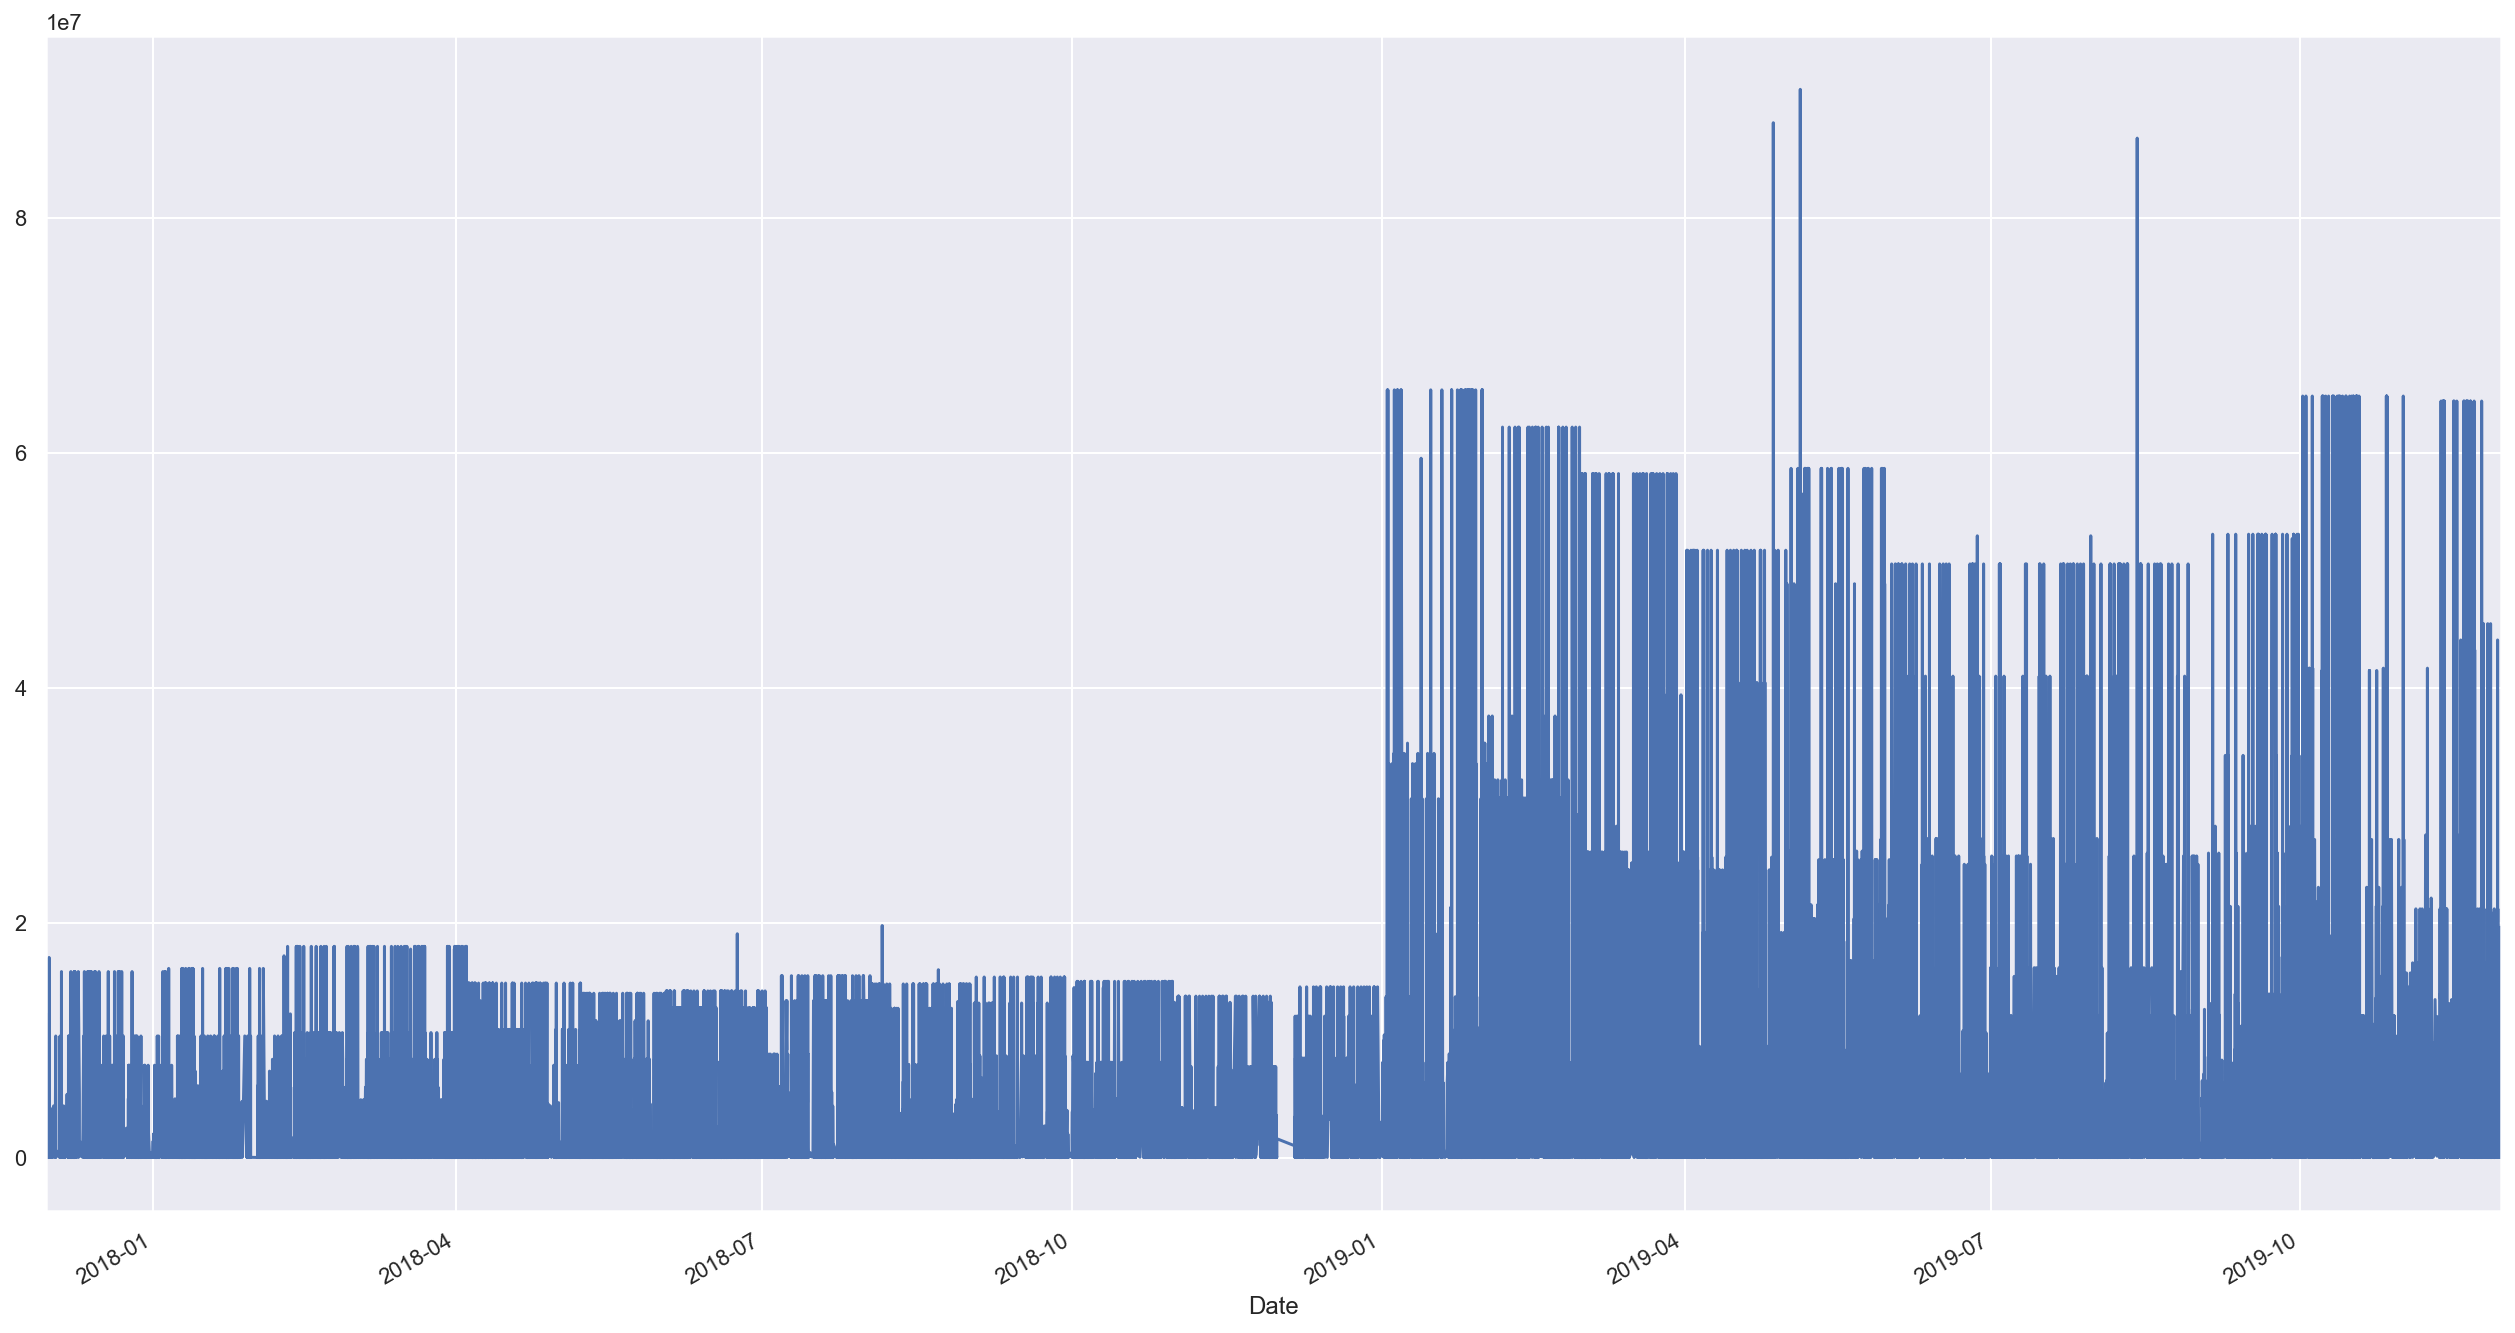

In [25]:
plt.figure(figsize = (22,12))
final_df_reach["Reach"].plot()

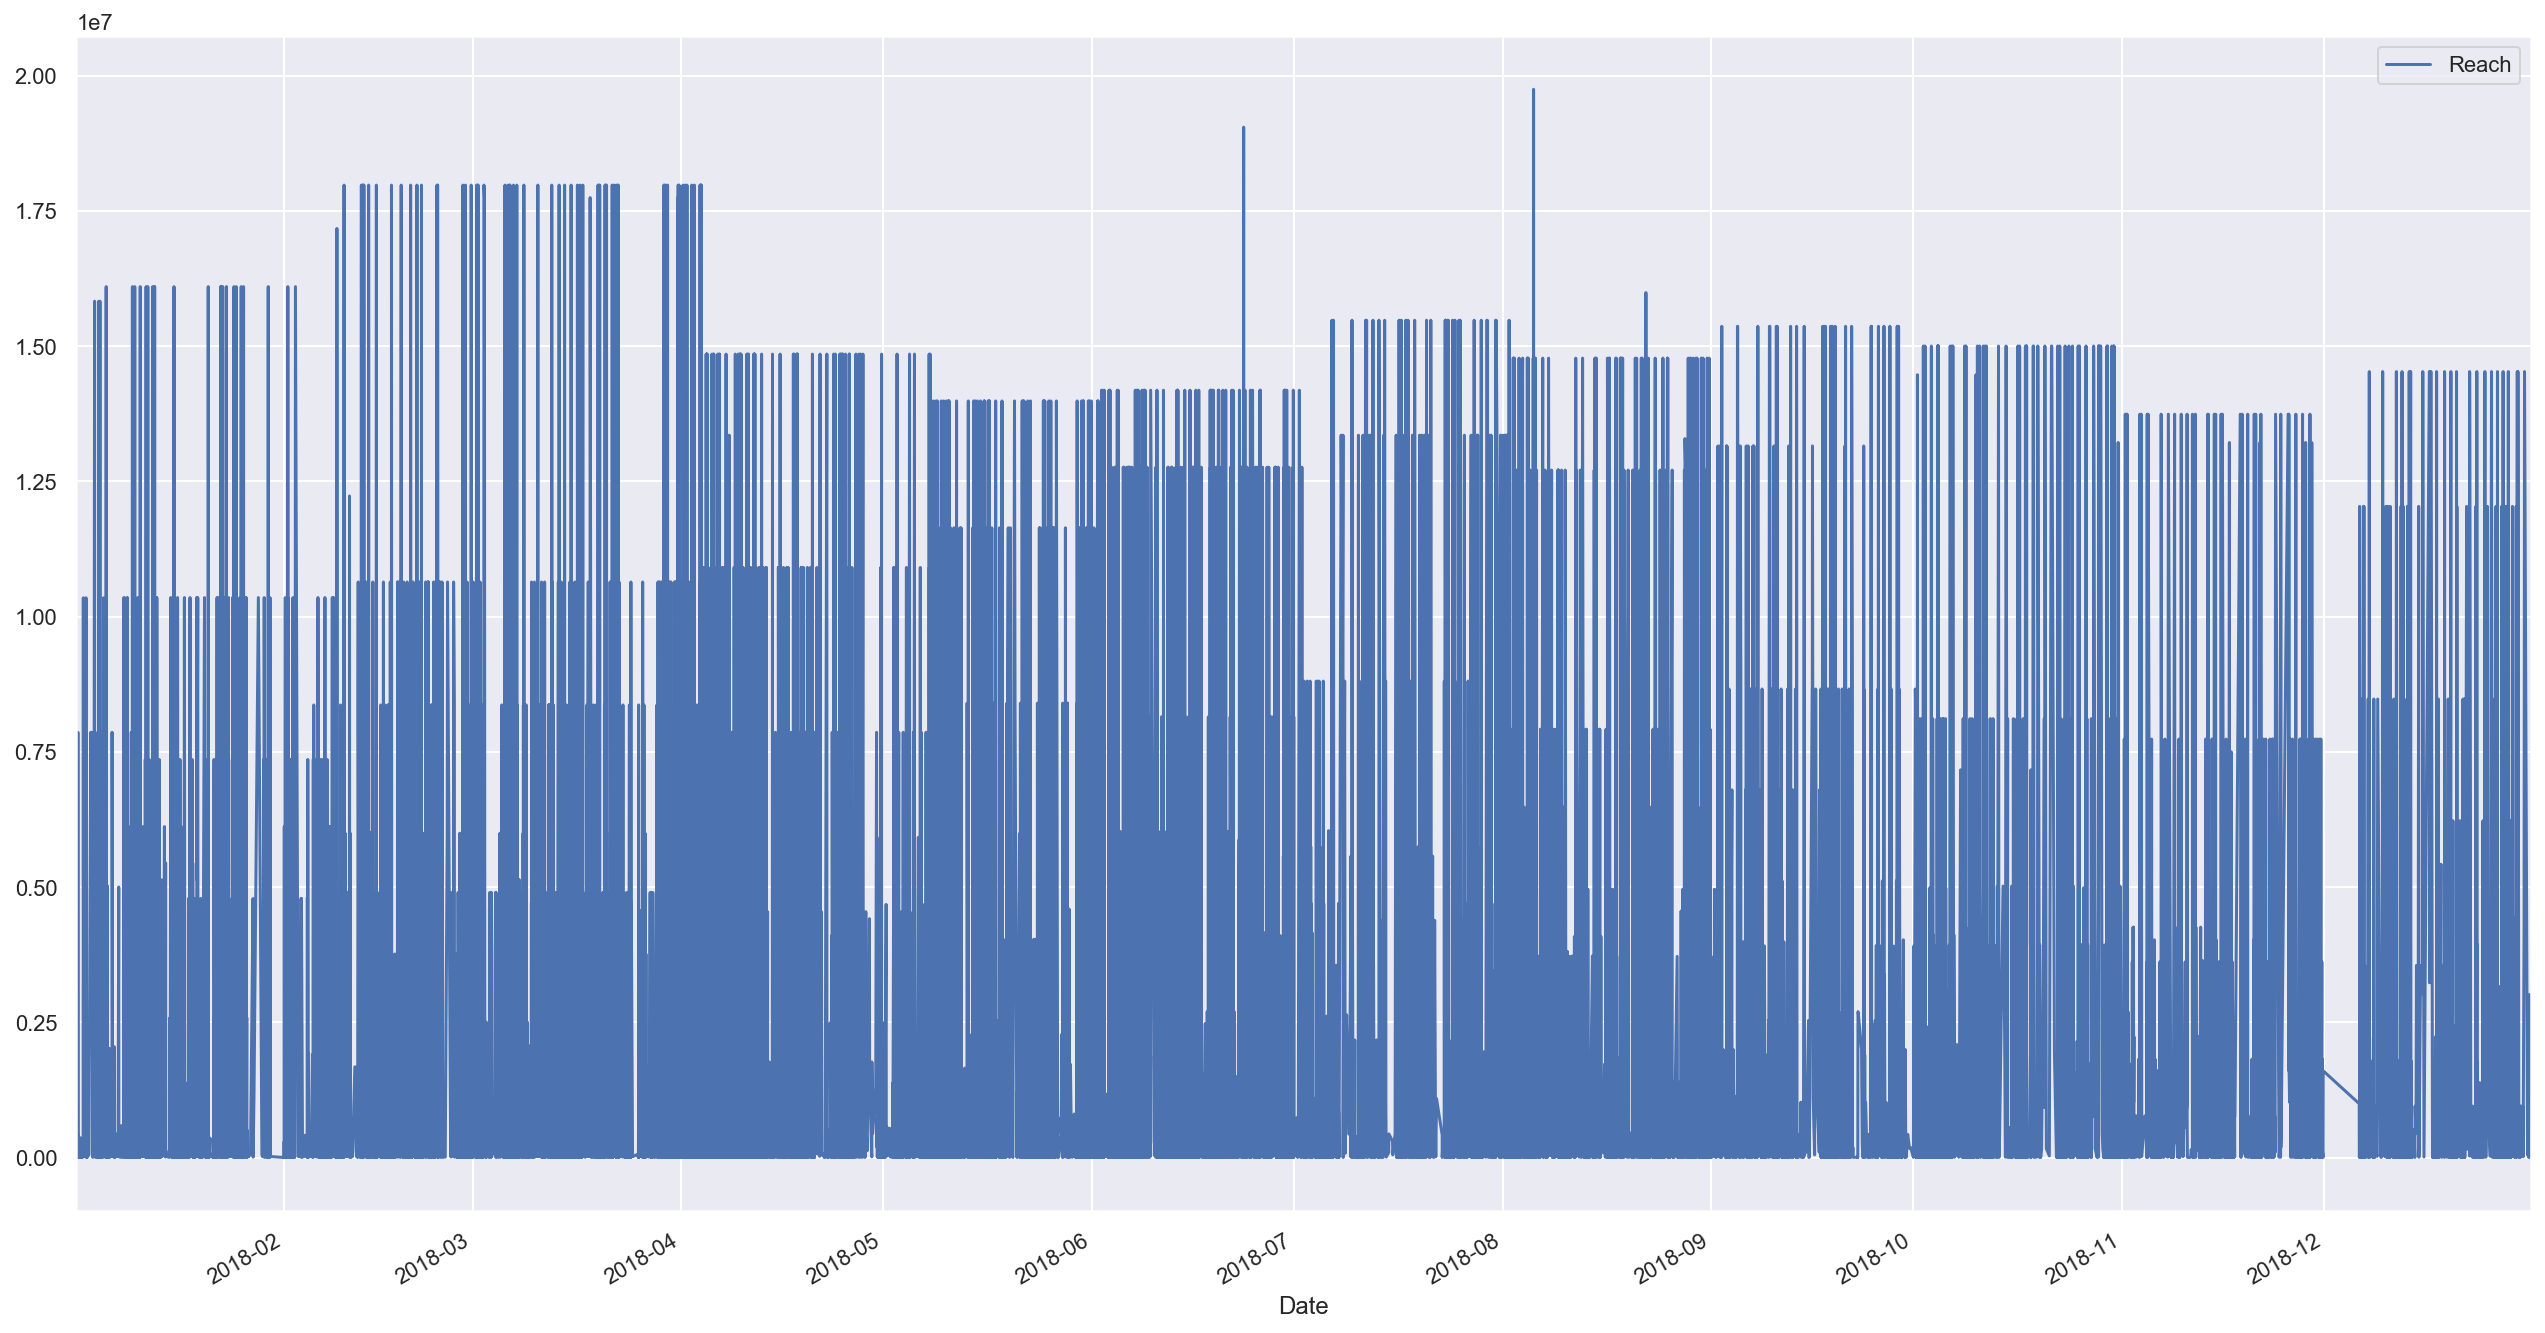

In [26]:

final_df_reach["2018"].plot(figsize = (22,12),legend = True)

In [27]:
def PlotModelResults(model, y_test, X_test,title, plot_intervals=False, plot_anomalies=False, scale=1.96):
    
    predictions = model[0].predict(X_test)
    
    for i in range(1,len(model)):
        predictions += model[i].predict(X_test)
    
    predictions = predictions/len(model)
    
    #predictions = model.predict(X_test)
    
    plt.figure(figsize = (12,6))
    
    plt.plot(predictions, 'g', label = 'Predictions')
    plt.plot(y_test.values, 'r', label = "Actual Values")
    
    
    if plot_intervals:
        cv = cross_val_score(model[0], X_test.values, predictions, cv = tscv, scoring = 'neg_mean_squared_error' )
        error = np.sqrt(np.std(cv)) #Just 'np.std(cv)' is way too high of a boundary
        lower_bound = predictions - error*scale
        higher_bound = predictions + error*scale
        
        plt.plot(lower_bound, 'b--', label = "Upper & Lower Bounds")
        plt.plot(higher_bound, 'b--')
        
        if plot_anomalies:
            
            dummy_test = np.array(len(y_test)*[None])
            dummy_test[(y_test.values < lower_bound) & (y_test.values > higher_bound)] = y_test.values[(y_test.values < lower_bound) & (y_test.values > higher_bound)]
            plt.plot(dummy_test,'go',label = 'Anomalies')
            
    if title:
            plt.title(title)
    else:
        mape = mean_absolute_percentage_error(y_test,predictions)
        plt.title("Mean Absolute Percentage Error: {}%".format(mape))
    plt.legend()
    plt.tight_layout()

## Training a model on 2019 dataset from January to September

In [28]:
data = final_df_reach["2019-01":"2019-11"]

In [29]:
data = data.resample('24H').sum()

In [30]:
for i in range(2,50):
        data["lag_{}".format(i)] = data["Reach"].shift(i)
       


In [31]:
X = data.dropna().drop(['Reach'],axis = 1)
y = data.dropna()["Reach"]

In [32]:
X_train = X["2019-01-02":"2019-09-30"]

In [33]:
X_test = X["2019-10-01":]

In [34]:
y_train = y["2019-01-02":"2019-09-30"]
y_test = y["2019-10-01":]

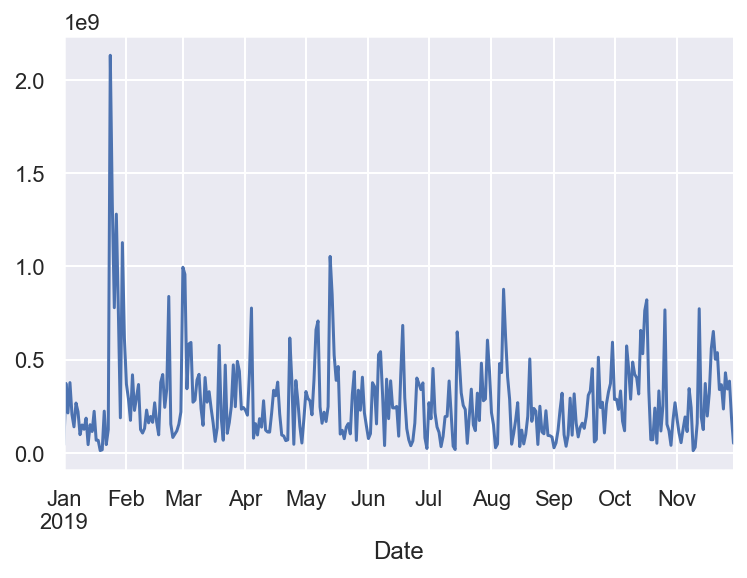

In [35]:
data["Reach"].plot()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [37]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

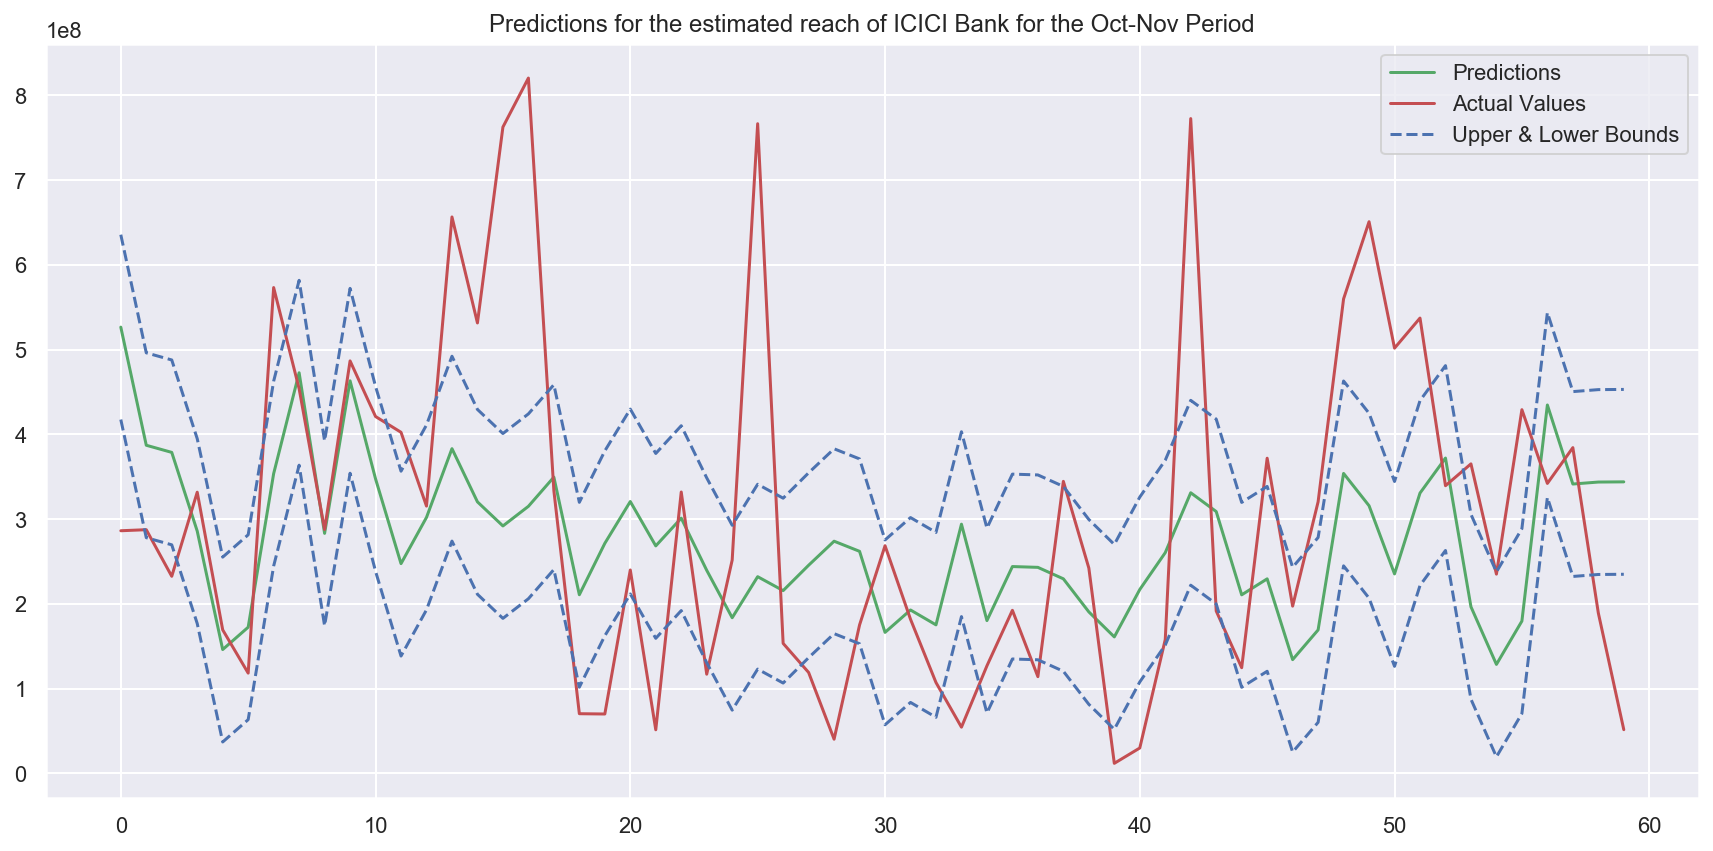

In [38]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)




tscv = TimeSeriesSplit(n_splits=4)
PlotModelResults([xgb],y_test,X_test,title= "Predictions for the estimated reach of ICICI Bank for the Oct-Nov Period",plot_intervals=True,plot_anomalies=False,)

## Using Sources and other Informaton as features (Feature Engineering) 

In [39]:
comb_df = comb_df.set_index("Date")

In [40]:
comb_df.set_index(pd.to_datetime(comb_df.index),inplace = True)

In [41]:
comb_df.columns

Index(['Headline', 'URL', 'Opening Text', 'Hit Sentence', 'Source',
       'Influencer', 'Country', 'Subregion', 'Language', 'Reach',
       'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo',
       'Facebook Social Echo', 'Reddit Social Echo', 'National Viewership',
       'Engagement', 'AVE', 'Sentiment', 'Key Phrases', 'Input Name',
       'Keywords', 'Document Tags'],
      dtype='object')

In [42]:
featured_df = comb_df.drop(["Headline","URL","Opening Text","Hit Sentence","Influencer","Country",'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo','Facebook Social Echo', 'Reddit Social Echo', 'National Viewership','Engagement','Sentiment', 'Key Phrases', 'Input Name','Document Tags',"Keywords"], axis =1)

In [43]:
featured_df = featured_df["2019"]

Clearly, $\verb|Reach|$ is our regression target and other columns are features, that'll help us predicting the target.

In [44]:
len(featured_df.Source.unique())

861

#### Hence, we have 861 unique $\verb|Sources|$!!! That's a LOT, therefore, we will consider only a small fraction of it (everything else will be $\verb|misc|$), and that fraction will be determined as shown below

In [45]:
featured_df.Reach.max()

90911787

In [46]:
featured_df[featured_df.Reach == featured_df.Reach.max()].Source

Date
2019-05-05 09:00:00    MSN हिंदी
Name: Source, dtype: object

In [47]:
top_sources = featured_df.nlargest(1000,"Reach").Source.unique()

In [48]:
top_sources

array(['MSN हिंदी', 'NDTV.com', 'Indiatimes.com', 'News18.com',
       'India Today', 'Indiatoday - Prnewswire', 'Times Now',
       'The Indian Express', 'The Times Of India', 'GSMArena.com'],
      dtype=object)

In [49]:
featured_df.loc["2019-04-27 08:38:00"]["Source"]

'MSN हिंदी'

In [50]:
for i,source in enumerate(top_sources):
    featured_df.replace(source,i,inplace=True)

In [51]:
for i in range(len(featured_df)):
    if isinstance(featured_df.iloc[i]["Source"],str):
        featured_df.replace(featured_df.iloc[i]["Source"],10,inplace=True)
    

Put all other sources as label $\verb|10|$

#### Done

In [52]:
featured_df.sort_values(by=["Reach"],ascending=False).nlargest(10,"Reach")

,Source,Subregion,Language,Reach,AVE
Date,,,,,
2019-05-05 09:00:00,0,National,Hindi,90911787,840934.03
2019-04-27 08:38:00,0,National,Hindi,88069602,814643.82
2019-08-13 11:51:00,0,National,Hindi,86759850,802528.61
2019-01-26 21:58:00,1,National regional,English,65335417,604352.61
2019-01-24 12:12:00,1,National regional,English,65335417,604352.61
2019-01-21 18:50:00,1,National regional,English,65335417,604352.61
2019-01-23 12:14:00,1,National regional,English,65335417,604352.61
2019-01-28 02:53:00,1,National regional,English,65335417,604352.61
2019-01-27 21:53:00,1,National regional,English,65335417,604352.61


To find top Subregions by Reach 

In [53]:
top_regions = featured_df.nlargest(1000,"Reach").Subregion.unique()

Encoding the Subregion now

In [54]:
top_regions

array(['National', 'National regional', nan], dtype=object)

In [55]:
for i,region in enumerate(top_regions):
    featured_df.replace(region,i,inplace = True)

In [56]:
for i in range(len(featured_df)):
    if isinstance(featured_df.iloc[i]["Subregion"],str):
        featured_df.replace(featured_df.iloc[i]["Subregion"], 3,inplace = True)

Encoding the $\verb|Language|$

In [57]:
top_languages = featured_df.nlargest(200,"Reach").Language.unique()

In [58]:
top_languages

array(['Hindi', 'English', 'Bengali'], dtype=object)

In [59]:
for i,lang in enumerate(top_languages):
    featured_df.replace(lang,i,inplace = True)

In [60]:
for i in range(len(featured_df)):
    if isinstance(featured_df.iloc[i]["Language"],str):
        featured_df.replace(featured_df.iloc[i]["Language"], 3,inplace = True)

In [61]:
featured_df

,Source,Subregion,Language,Reach,AVE
Date,,,,,
2019-01-01 06:00:00,10,0,1,1086284,10048.13
2019-01-01 06:00:00,10,3,1,612565,5666.23
2019-01-01 06:10:00,10,3,1,105091,972.09
2019-01-01 07:35:00,10,2,1,8110878,75025.62
2019-01-01 08:02:00,10,1,1,763176,7059.38
2019-01-01 11:12:00,10,3,0,112032,1036.30
2019-01-01 12:23:00,10,3,1,411425,3805.68
2019-01-01 12:57:00,10,3,0,110286,1020.15
2019-01-01 13:57:00,10,0,1,9956805,92100.45


* $\verb|Source|$: 0-9 are top 10 sources, everything else is given label $\verb|10|$
* $\verb|Subregion|$: 0-2 are top 3 regions, 'National', 'National regional', 'nan', everything else is given label $\verb|3|$    
* $\verb|Language|$: 0-2 are top 3 Languages, 'Hindi', 'English', 'Bengali', everything else is given label $\verb|3|$

In [62]:
featured_df

,Source,Subregion,Language,Reach,AVE
Date,,,,,
2019-01-01 06:00:00,10,0,1,1086284,10048.13
2019-01-01 06:00:00,10,3,1,612565,5666.23
2019-01-01 06:10:00,10,3,1,105091,972.09
2019-01-01 07:35:00,10,2,1,8110878,75025.62
2019-01-01 08:02:00,10,1,1,763176,7059.38
2019-01-01 11:12:00,10,3,0,112032,1036.30
2019-01-01 12:23:00,10,3,1,411425,3805.68
2019-01-01 12:57:00,10,3,0,110286,1020.15
2019-01-01 13:57:00,10,0,1,9956805,92100.45


Hence, we can go ahead and train it on this data

Resampling at per day frequency

In [63]:
featured_df_evd = featured_df.resample("24H").sum()     #'evd' for everyday

In [64]:
featured_df_evd.columns

Index(['Source', 'Subregion', 'Language', 'Reach', 'AVE'], dtype='object')

For training, we'll use $\verb|January to September|$ data, and test it on $\verb|October to November's|$ data.

Creating windows:

In [65]:
def MA_cum_lag_creator(df,start,end,window,MA=False): #'ALL' includes new Moving Averages Columns too
    if MA:
        for df_col in df.columns:
            df[str(df_col)+"_MA"] = df[str(df_col)].rolling(window).mean()
        
    columns = df.columns
    
    for i in range(start,end):
        for col in columns:
            df[str(col)+"_lag_"+"_{}".format(i)] = df[str(col)].shift(i)

In [66]:
MA_cum_lag_creator(featured_df_evd,1,50,5)

In [67]:
X = featured_df_evd.dropna().drop(['Source', 'Subregion', 'Language', 'Reach', 'AVE'],axis = 1)
y = featured_df_evd.dropna()["Reach"]

In [68]:
X_train_2 = X["2019-02":"2019-09"]
y_train_2 = y["2019-02":"2019-09"]

In [69]:
X_test_2 = X["2019-10":]
y_test_2 = y["2019-10":]

$\verb|Train tRain trAin traIn traiN|$

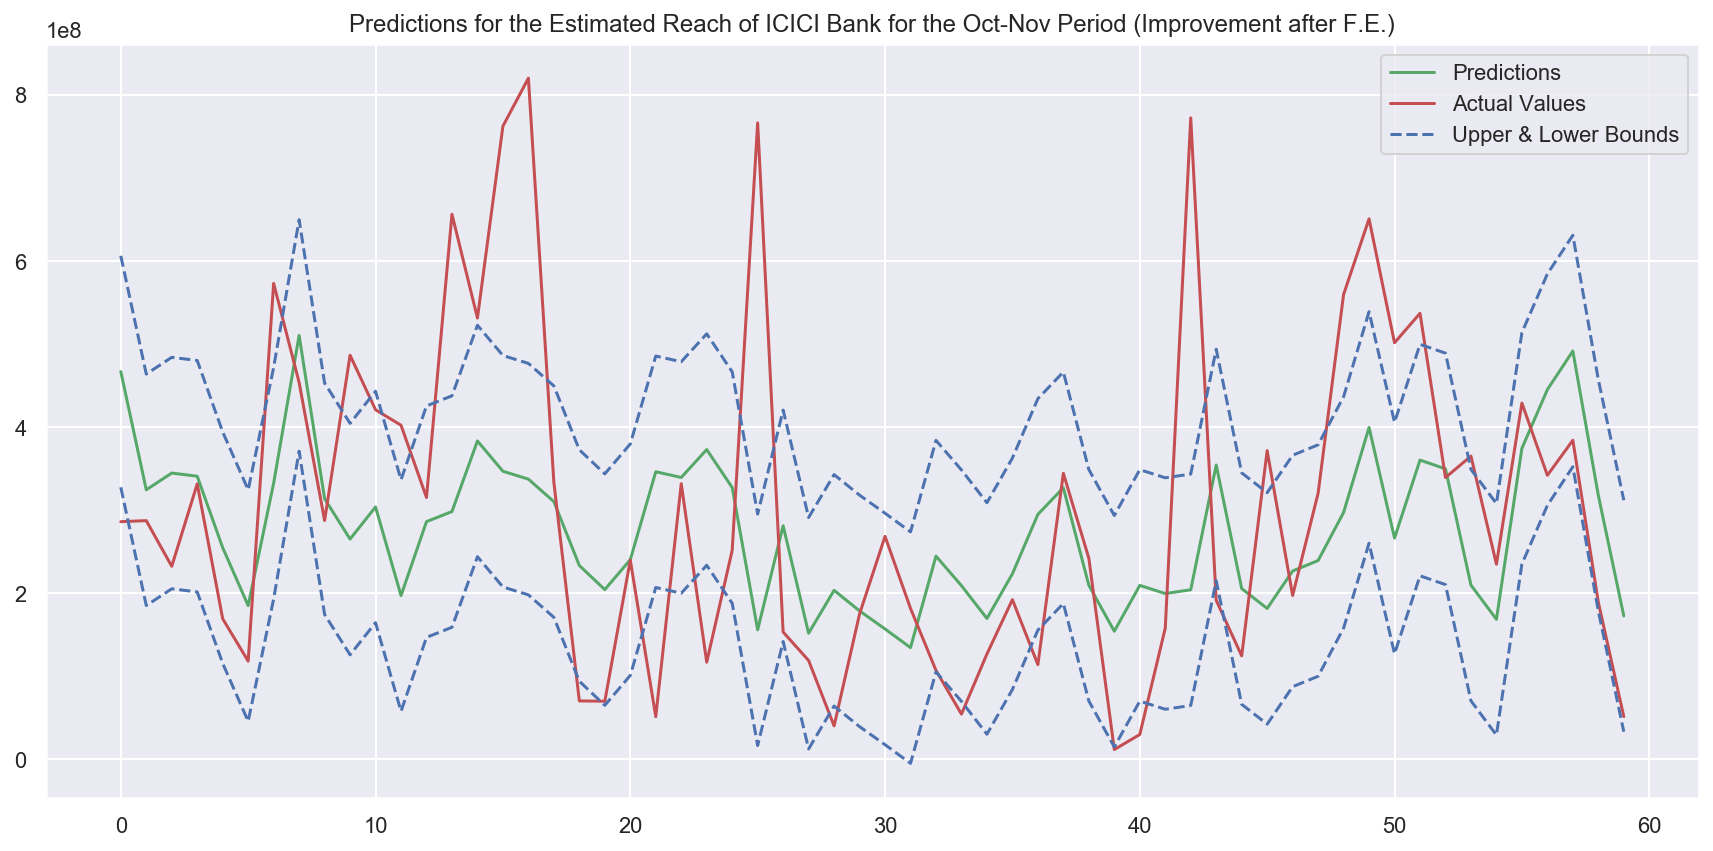

In [71]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train_2,y_train_2)

xgb = GradientBoostingRegressor()
xgb.fit(X_train_2,y_train_2)

tscv = TimeSeriesSplit(n_splits=4)
PlotModelResults([xgb],y_test_2,X_test_2,title= "Predictions for the Estimated Reach of ICICI Bank for the Oct-Nov Period (Improvement after F.E.)",plot_intervals=True,plot_anomalies=False,)


## Ensembling

The prediction of one $\verb|XGBRegressor|$ for the Testing days will be the input for another model (possibly also $\verb|XGBRegressor|$)

* #### Training Model 1 on February to September

In [74]:
from sklearn.preprocessing import StandardScaler

In [80]:
def complete_scaler(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    return pd.DataFrame(data=df_scaled,columns = df.columns, index = df.index)

In [82]:
X_train_2_scaled_df = complete_scaler(X_train_2)

In [87]:
y_train_2_scaled_df = complete_scaler(pd.DataFrame(y_train_2))

In [88]:
xgb_1 = GradientBoostingRegressor()
xgb_1.fit(X_train_2_scaled_df,y_train_2_scaled_df)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
predictions_1 = xgb_1.predict(complete_scaler(X))

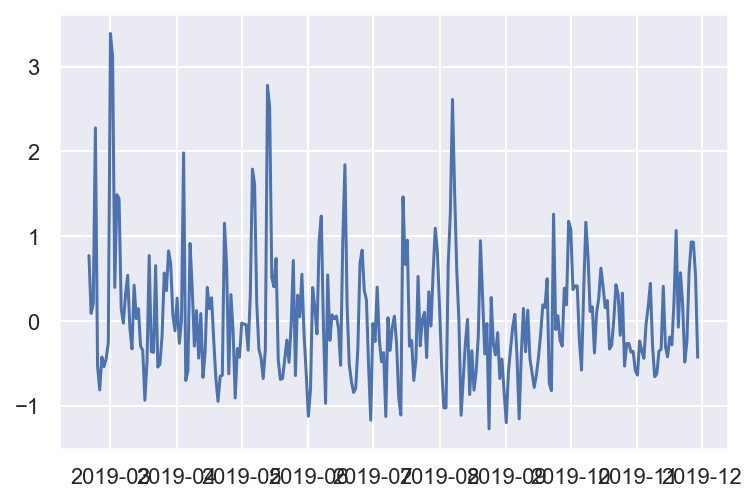

In [90]:
plt.plot(X.index,predictions_1)

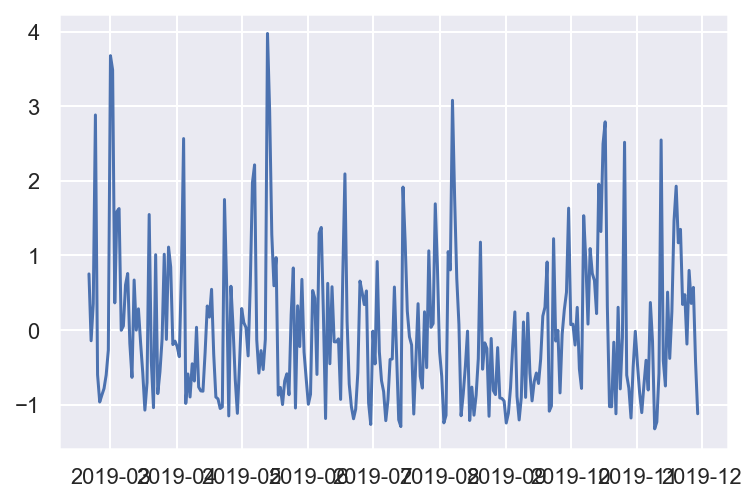

In [93]:
plt.plot(complete_scaler(pd.DataFrame(y)))

In [95]:
featured_df_ens = featured_df.resample("24H").sum()     #'evd' for everyday

In [96]:
predictions_1_df = pd.DataFrame(data = predictions_1,index = featured_df_ens["2019-02-19":].index,columns=["Predicted Reach"])

In [97]:
MA_cum_lag_creator(featured_df_ens,1,50,5)

In [98]:
X_ens = featured_df_evd.dropna().drop(['Source', 'Subregion', 'Language', 'Reach', 'AVE'],axis = 1)
y_ens = featured_df_evd.dropna()["Reach"]

In [99]:
X_ens["Predicted_Reach"] = predictions_1_df

In [100]:
X_train_ens = X["2019-02":"2019-09"]
y_train_ens = y["2019-02":"2019-09"]

In [101]:
X_test_ens = X["2019-10":]
y_test_ens = y["2019-10":]

In [108]:
y_test_ens_scaled_df = complete_scaler(pd.DataFrame(y_test_ens))
X_test_ens_scaled_df = complete_scaler(X_test_ens)

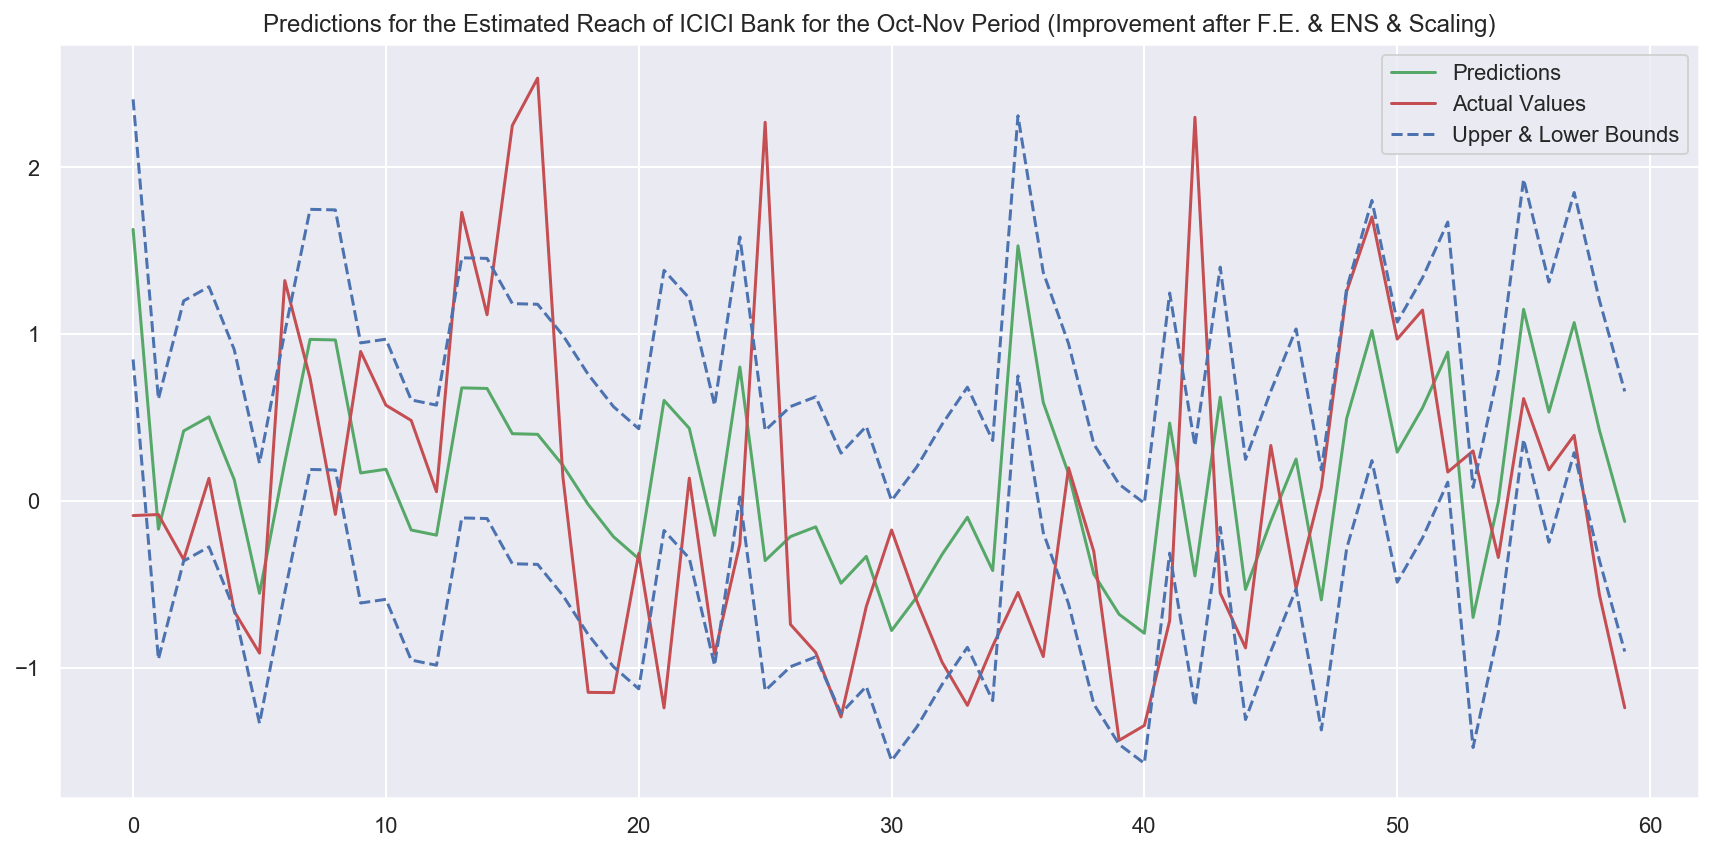

In [112]:
xgb_2 = GradientBoostingRegressor()
X_train_ens_scaled_df = complete_scaler(X_train_ens)
y_train_ens_scaled_df = complete_scaler(pd.DataFrame(y_train_ens))
xgb_2.fit(X_train_ens_scaled_df,y_train_ens_scaled_df)

PlotModelResults([xgb_2],y_test_ens_scaled_df,X_test_ens_scaled_df,title= "Predictions for the Estimated Reach of ICICI Bank for the Oct-Nov Period (Improvement after F.E. & ENS & Scaling)",plot_intervals=True,plot_anomalies=False)

Clearly not much improvement, as we don't have a good base model and we don't have enough training data too.